In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## (Just a simple) Muse Fan Base Analysis 

This is a fan base analysis for the British rock band Muse! I'm a fan since 2012 and have been streaming them 7/24 in this winter vacation. I've always been curious about what people like of Muse, and when I saw the poll I though I'd do something fun with the data. The original data is from [this poll](https://www.reddit.com/r/Muse/comments/aepifo/results_for_muse_poll_here/) from **r/Muse**. Shout out for **u/trickfinger96** for letting me use the data!

In [19]:
df = pd.read_csv('Muse.csv')
df.head()

,Timestamp,What is your favourite Muse album?,What is your 2nd favourite Muse album? (Please don't pick the same one guys!),What is your least favourite Muse album?,"What album contained the very first Muse song you heard? (E.g. if the first song you heard was Starlight, pick BHaR)",What was the first Muse album you listened to in it's entirety?,During what year did you become a Muse fan?,Please select your favourite music genres (min 1)
0,2019/01/09 1:38:56 pm GMT,The Resistance,Origin Of Symmetry,Showbiz,The Resistance,Black Holes & Revelations,2010,Alternative;Electronic;Rock
1,2019/01/09 1:47:22 pm GMT,Absolution,Simulation Theory,The Resistance,The Resistance,The Resistance,2009,Alternative;Blues;Rock
2,2019/01/09 1:48:56 pm GMT,The 2nd Law,Drones,Origin Of Symmetry,The 2nd Law,The 2nd Law,2017,Alternative;Classical;Indie;Pop;Rock
3,2019/01/09 1:49:18 pm GMT,Black Holes & Revelations,Absolution,Simulation Theory,Black Holes & Revelations,Black Holes & Revelations,2006,Alternative;Classical;Rock
4,2019/01/09 1:49:59 pm GMT,Origin Of Symmetry,The Resistance,Drones,The Resistance,Origin Of Symmetry,2016,Alternative;Indie;Rock


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1626 entries, 0 to 1625
Data columns (total 8 columns):
Timestamp                                                                                                                1626 non-null object
What is your favourite Muse album?                                                                                       1626 non-null object
What is your 2nd favourite Muse album? (Please don't pick the same one guys!)                                            1626 non-null object
What is your least favourite Muse album?                                                                                 1626 non-null object
What album contained the very first Muse song you heard? (E.g. if the first song you heard was Starlight, pick BHaR)     1626 non-null object
What was the first Muse album you listened to in it's entirety?                                                          1626 non-null object
During what year did you become a Muse fan

So these are the questions asked in the Google forms. We totally have 1627 fans from the subreddit responded.

### Some cleaning

In [21]:
df.drop('Timestamp', axis=1, inplace=True)
df.columns = ['fav', 'fav2', 'least', 'first_song', 'first_album', 'year', 'genre']
df.head()

,fav,fav2,least,first_song,first_album,year,genre
0,The Resistance,Origin Of Symmetry,Showbiz,The Resistance,Black Holes & Revelations,2010,Alternative;Electronic;Rock
1,Absolution,Simulation Theory,The Resistance,The Resistance,The Resistance,2009,Alternative;Blues;Rock
2,The 2nd Law,Drones,Origin Of Symmetry,The 2nd Law,The 2nd Law,2017,Alternative;Classical;Indie;Pop;Rock
3,Black Holes & Revelations,Absolution,Simulation Theory,Black Holes & Revelations,Black Holes & Revelations,2006,Alternative;Classical;Rock
4,Origin Of Symmetry,The Resistance,Drones,The Resistance,Origin Of Symmetry,2016,Alternative;Indie;Rock


Dropped the Timestamp. Changed column names to be easier for reference later.

In [22]:
df['fav'].value_counts()

Origin Of Symmetry           529
Absolution                   410
Black Holes & Revelations    351
The Resistance               119
The 2nd Law                   61
Showbiz                       55
Drones                        51
Simulation Theory             50
Name: fav, dtype: int64

In [23]:
albums = {'Showbiz':1, 
          'Origin Of Symmetry':2, 
          'Absolution':3, 
          'Black Holes & Revelations':4, 
          'The Resistance':5, 
          'The 2nd Law':6, 
          'Drones':7, 
          'Simulation Theory':8}

for col in ['fav', 'fav2', 'least', 'first_song', 'first_album']:
    df[col] = df[col].map(albums)
    
df.head()

,fav,fav2,least,first_song,first_album,year,genre
0,5,2,1,5.0,4,2010,Alternative;Electronic;Rock
1,3,8,5,5.0,5,2009,Alternative;Blues;Rock
2,6,7,2,6.0,6,2017,Alternative;Classical;Indie;Pop;Rock
3,4,3,8,4.0,4,2006,Alternative;Classical;Rock
4,2,5,7,5.0,2,2016,Alternative;Indie;Rock


In [25]:
df.loc[df['year'] == 'Pre-1999', 'year'] = 1998
df['year'] = df['year'].astype('int64')

In [32]:
df['first_song'].fillna(value=df['first_song'].value_counts().reset_index()['index'][0], inplace=True)
df['first_song'] = df['first_song'].astype('int64')
df.head()

,fav,fav2,least,first_song,first_album,year,genre
0,5,2,1,5,4,2010,Alternative;Electronic;Rock
1,3,8,5,5,5,2009,Alternative;Blues;Rock
2,6,7,2,6,6,2017,Alternative;Classical;Indie;Pop;Rock
3,4,3,8,4,4,2006,Alternative;Classical;Rock
4,2,5,7,5,2,2016,Alternative;Indie;Rock


Mapped the record names to the sequence of release. Changed some data types to int64.

In [35]:
# era1: showbiz, oos
# era2: bh&r, resistance
# era3: t2l, drones, st

df['fan_era'] = 1
df.loc[df['year'].between(2006, 2011), 'fan_era'] = 2
df.loc[df['year'].between(2012, 2020), 'fan_era'] = 3
df['fan_era'].value_counts()

3    861
2    574
1    191
Name: fan_era, dtype: int64

According to converntion, the career of Muse can be separated into 3 eras: pre-2006 (Showbiz, Origin of Symmetry, Absolution), I'd call it gothic and quirky era; 2006-2011 (Blackhole and Revelations, The Resistance), the conspiracy era; and 2012-now (The 2nd Law, Drones, Simulation Theory), ...catchy era (well). 

In [42]:
genres = set()
for _, row in df.iterrows():
    genre = row['genre'].split(';')
    for g in genre:
        if g not in genres:
            genres.add(g)
genres

{'Acoustic/singer songwriter ',
 "All of the above and more (especially fond nowadays of contemporary classical like Jóhann Jóhannsson's Orphée.",
 'Alt-rock, punk rock etc. ',
 'Alternative',
 'Ambient',
 'Ambient/Noise',
 'Bluegrass',
 'Blues',
 'Broadway',
 'Christian Worship',
 'Classical',
 'Classical rock',
 'Country',
 'Cyberpunk (basically a version of electronic) ',
 'Dance',
 'Dark wave',
 'Drum n Bass',
 'Electronic',
 'Experimental',
 'Folk',
 'Funk',
 'Funk Rock',
 'Funk, Experimental',
 'Gothic',
 'Gregorian chanting ',
 'Grunge, Psychedelic Rock, Shoegaze',
 'Hard rock',
 'Hip Hop',
 'Hip Hop / Rap',
 'Hip-Hop',
 'Hip-hop',
 'Indie',
 'Industrial',
 'Industrial Metal',
 'J-Pop',
 'J-rock',
 'Jazz',
 'K-pop',
 'Kpop',
 'Kpop lol',
 'Literally all',
 'Metal',
 'Metalcore',
 'Minimalism',
 'Musical theater ',
 'New wave',
 'No preference',
 'Original soundtracks',
 'Pop',
 'Pop punk',
 'Post hardcore, electronicore',
 'Post-punk',
 'Post-rock',
 'Prog',
 'Prog Rock',
 'Prog

In [54]:
genre_col = ['acoustic', 'alternative', 'blues', 'classical', 'country', 'electronic', 'hip hop', 'rap', 'pop', 'latin', 
             'rock', 'metal', 'prog', 'punk', 'grunge']    # umm biased for rock subgenres ofc
for col in genre_col:
    df[col] = 0
    df.loc[df['genre'].str.contains(col), col] = 1
    print('\n' + col)
    print(df[col].value_counts())    # if too few counts then won't use this genre, some special genres


acoustic
0    1625
1       1
Name: acoustic, dtype: int64

alternative
1    1268
0     358
Name: alternative, dtype: int64

blues
0    1487
1     139
Name: blues, dtype: int64

classical
0    1288
1     338
Name: classical, dtype: int64

country
0    1602
1      24
Name: country, dtype: int64

electronic
0    1165
1     461
Name: electronic, dtype: int64

hip hop
0    1381
1     245
Name: hip hop, dtype: int64

rap
0    1381
1     245
Name: rap, dtype: int64

pop
0    1293
1     333
Name: pop, dtype: int64

latin
0    1626
Name: latin, dtype: int64

rock
1    1418
0     208
Name: rock, dtype: int64

metal
0    1049
1     577
Name: metal, dtype: int64

prog
0    1607
1      19
Name: prog, dtype: int64

punk
0    1606
1      20
Name: punk, dtype: int64

grunge
0    1624
1       2
Name: grunge, dtype: int64


In [63]:
df.drop(['acoustic', 'grunge', 'latin'], axis=1, inplace=True)
df.head()

,fav,fav2,least,first_song,first_album,year,genre,fan_era,alternative,blues,classical,country,electronic,hip hop,rap,pop,rock,metal,prog,punk
0,5,2,1,5,4,2010,alternative;electronic;rock,2,1,0,0,0,1,0,0,0,1,0,0,0
1,3,8,5,5,5,2009,alternative;blues;rock,2,1,1,0,0,0,0,0,0,1,0,0,0
2,6,7,2,6,6,2017,alternative;classical;indie;pop;rock,3,1,0,1,0,0,0,0,1,1,0,0,0
3,4,3,8,4,4,2006,alternative;classical;rock,2,1,0,1,0,0,0,0,0,1,0,0,0
4,2,5,7,5,2,2016,alternative;indie;rock,3,1,0,0,0,0,0,0,0,1,0,0,0


Now deal with the genre preferences. This is a textual entry in the Google forms so it is a bit difficult to clean it up. I first found out all the distinctive values fans entered, and add variables for those relatively popular and large genres with one-hot encoding. Personally, I love metal and prog, and rock generally, so I left a few subgenres for rock 🤘.

### Some simple figures

Most of the variables here are categorical, and they don't seem to interact with each other particularly closely. So basic univariate analysis would be enough to see the distributions.

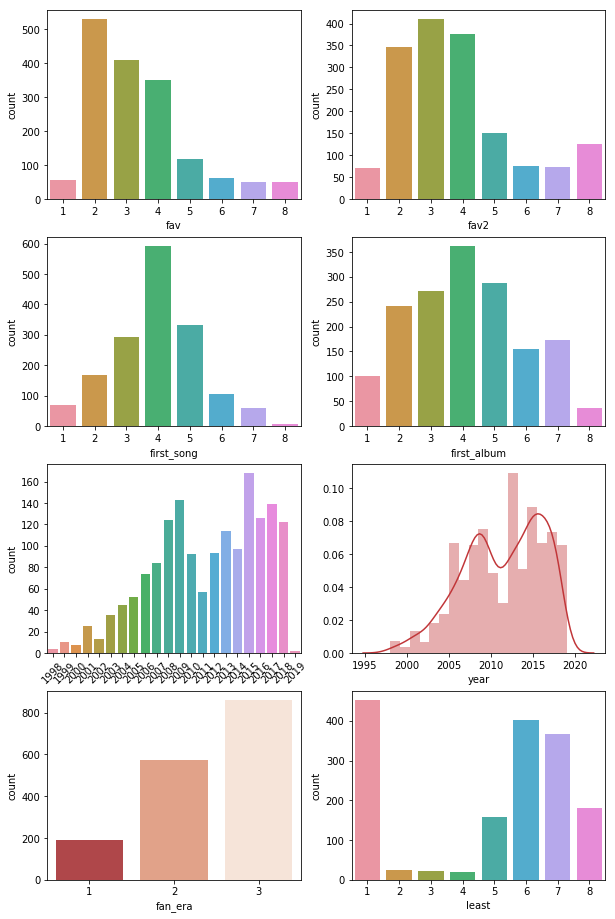

In [77]:
sns.set_palette('RdBu')

fig, axes = plt.subplots(4, 2, figsize=(10,16))
ax0 = sns.countplot(df['fav'], ax=axes[0,0])
ax1 = sns.countplot(df['fav2'], ax=axes[0,1])
ax2 = sns.countplot(df['first_song'], ax=axes[1,0])
ax3 = sns.countplot(df['first_album'], ax=axes[1,1])
ax4 = sns.countplot(df['year'], ax=axes[2,0])
ax4.set_xticklabels([n for n in range(1998, 2020)], rotation=45)
ax5 = sns.distplot(df['year'], ax=axes[2,1])
ax6 = sns.countplot(df['fan_era'], ax=axes[3,0])
ax7 = sns.countplot(df['least'], ax=axes[3,1])

Some conclusions here:
- From the first row: generally people love OOS, Absolution and BH&R.
- From the second row: looks like Muse got their fame or major fan base growth around BH&R, because most people's first Muse song is from there and it's also the first album listened to in its integrity. (I guess the song would be Supermassive Blackhole!)
- From the third row, we can see a surge in the number of fans at around 2009 and 2015. Umm, 2009 was the release of The Resistance, which is a critical album too. Here's a little anecdote: [China banned them because of Uprising from this album](https://kroq.radio.com/blogs/kevin-bean-show/muse-uprising-china) (btw I'm from China). 2015 was the release of Drones.
- From the fourth row, we see the distribution of 3-tier fans. They are really becoming famous...

I myself am a fan since 2012, so I belong to the second tier. The first song I've listened to is Madness from The 2nd Law, but the album turns out to be my least favorite one. My favorite album is Original of Symmetry, it involves a bit of conspiracy theory too, and the same concept of the [album art](https://en.wikipedia.org/wiki/Origin_of_Symmetry) is used in the latest Black Mirror interactive episode [Bandersnatch](https://www.netflix.com/title/80988062). As I love their older stuff, I want to check if my taste aligns better with the early fans.

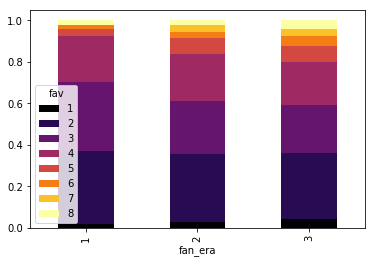

In [93]:
tmp = df.groupby(['fan_era', 'fav']).size().unstack()
tmp.div(tmp.sum(1).astype('float'), axis=0).plot.bar(stacked=True, cmap='inferno')

Here we can see, as new fans join the club, new albums are being favored more. It is not very clear to see, but the overall favorite albums are the same for different fan groups (OOS, Absolution and BH&R). But apparantly old fans love old stuff better, and it is reasonable.

I'm also curious about what genres old fans like. I personally like metal and prog, a lot. I've been listening to those heavy and progressive stuff since junior high as an angst teenage, from there I digged out Muse because in certain sense, they are the most progressive and heavy one among "Britpop". (And they were gothic in early days, very popular in Japan.) So I want to check how do fans like these genres specifically.

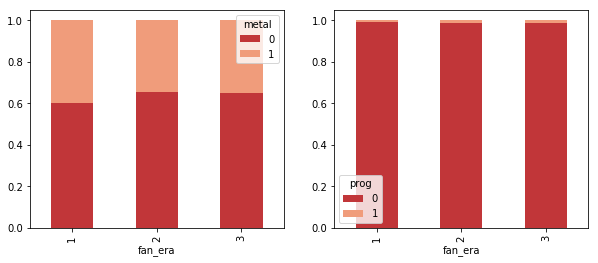

In [111]:
fig, axes = plt.subplots(1,2,figsize=(10, 4))
tmp0 = df.groupby(['fan_era', 'metal']).size().unstack()
tmp0.div(tmp0.sum(1).astype('float'), axis=0).plot.bar(stacked=True, ax=axes[0])
tmp1 = df.groupby(['fan_era', 'prog']).size().unstack()
tmp1.div(tmp1.sum(1).astype('float'), axis=0).plot.bar(stacked=True, ax=axes[1])

In [113]:
df.loc[(df['metal'] == 1) & (df['prog'] == 1), 'fav'].value_counts()

2    4
3    3
5    1
4    1
Name: fav, dtype: int64

Turns out, old fans like metal better than new fans! But only 9 fans voted for prog in this survey, still good to know.

### Side notes

This is just a very very simple and tiny analysis on a subset of fans, but I still got some interesting observations. I think this kind of analysis might be meaningful too, if carried out on a larger scale, whether for the band's profit or for making friends as a fan. I'm not doing this for any utilitarian reasons, I just love Muse.
<br> About research related to music, I know a very intriguing research by Dr Nadia Azar from University of Windsor, it's about [biomechanism of drummers](http://www.uwindsor.ca/dailynews/2017-12-21/breaking-down-beat-studying-biomechanics-drummers). I wish someday I'd have the chance to do something as cool as that!